In [2]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing import image

In [3]:
attr_data_path = "list_attr_celeba.csv"
images_data_path = "C:/Users/foreh/Documents/celeba/greyscale"
images_data_size = 20000 

width = 178
height = 218
x_ = 100                           # new value of x
image_size_ratio = width / height    # dimensions ratio
y_ = int(image_size_ratio * x_)  

original_image_size = (x_,y_)

In [4]:
df_org = pd.read_csv(attr_data_path)
df = df_org[images_data_size:images_data_size*2]
df = df.replace(-1,0)

In [5]:
images_data = list()
for idx in range(df.shape[0]):
    path = "{}/{}".format(str(images_data_path),str(df.iloc[idx].image_id))
    image = PIL.Image.open(path).resize(original_image_size)
    image_array = np.asarray(image)
    images_data.append(image_array)
images_data = np.array(images_data)

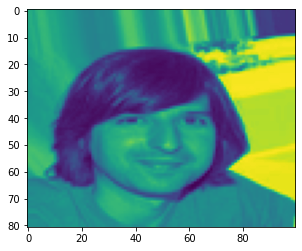

In [6]:
plt.imshow(images_data[3000])
def image_from_index(index, size=(original_image_size), path=images_data_path):
    path = "{}/{}".format(str(path),str(df.iloc[index].image_id))
    # to read the image
    image = PIL.Image.open(path).resize(size)
    image_array = np.asarray(image)
    
    return image_array

In [7]:
# fuction to get a list of all key points of the face
def image_attr_list(index, df=df):
    # box dictionary
    attr_list = [df.iloc[index].Straight_Hair,
                   df.iloc[index].Wavy_Hair,
                   df.iloc[index].Bangs,
                   df.iloc[index].Wearing_Hat]
    
    return attr_list

[0, 0, 0, 0]


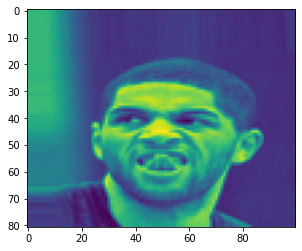

In [8]:
print(image_attr_list(300))
plt.imshow(images_data[300])

In [9]:
images = images_data # list of array of images
labels = df[["image_id", "Bangs", "Straight_Hair", "Wavy_Hair", "Wearing_Hat"]]  # dataframe of image features
print(labels)

         image_id  Bangs  Straight_Hair  Wavy_Hair  Wearing_Hat
20000  020001.jpg      0              0          0            0
20001  020002.jpg      0              0          0            0
20002  020003.jpg      1              1          0            0
20003  020004.jpg      1              0          1            0
20004  020005.jpg      0              0          0            0
...           ...    ...            ...        ...          ...
39995  039996.jpg      0              1          0            0
39996  039997.jpg      0              1          0            0
39997  039998.jpg      0              1          0            0
39998  039999.jpg      0              0          0            1
39999  040000.jpg      0              1          0            0

[20000 rows x 5 columns]


In [10]:
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.3,random_state=45)
print(train_labels)

         image_id  Bangs  Straight_Hair  Wavy_Hair  Wearing_Hat
24126  024127.jpg      0              0          0            0
33120  033121.jpg      0              0          0            0
34281  034282.jpg      1              0          0            0
33157  033158.jpg      1              0          0            0
23261  023262.jpg      0              0          0            0
...           ...    ...            ...        ...          ...
36547  036548.jpg      1              1          0            0
36317  036318.jpg      0              0          0            0
32895  032896.jpg      1              0          1            0
26012  026013.jpg      0              0          0            0
26558  026559.jpg      1              1          0            0

[14000 rows x 5 columns]


In [11]:
y_test=test_labels.drop(["image_id"],axis=1)
y_train=train_labels.drop(["image_id"],axis=1)

X_test=test_images
X_train=train_images
#X_train = tf.expand_dims(X_train, axis=-1)
print("Samples Training Set:",len(X_train))

Samples Training Set: 14000


Samples in Validation Data: 3000
Samples in Test Data: 3000
[[253 251 250 ...  63  62  64]
 [249 250 251 ...  62  64  66]
 [248 248 249 ...  63  61  65]
 ...
 [ 95  89  83 ... 233 233 234]
 [ 88  90  86 ... 231 233 234]
 [ 86  84  82 ... 229 231 231]]


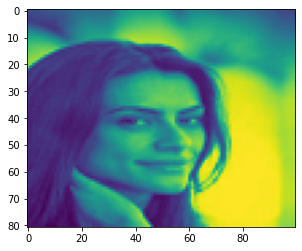

In [12]:
X_test, X_val, y_test, y_val=train_test_split(X_test, y_test,test_size=0.5,random_state=42)
print("Samples in Validation Data:",len(X_val))
print("Samples in Test Data:",len(X_test))
print(X_val[1])
plt.imshow(X_val[2])

In [13]:
x_ = original_image_size[0]
y_ = original_image_size[1]
print(y_,x_,1)

81 100 1


In [14]:
model = tf.keras.models.load_model("saved_models/local1-19999")

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 81, 100, 8)        72        
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 98, 8)         392       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 49, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 40, 49, 8)         0         
                                                                 
 locally_connected2d (Locall  (None, 39, 48, 3)        185328    
 yConnected2D)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 48, 16)        4

Empty box

In [16]:
model.compile(optimizer = "sgd",loss="binary_crossentropy",metrics = ['accuracy'])

In [17]:
checkpoint_filepath = 'C:/foreh/Documents/celeba/model_checkpoints'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=False)

In [ ]:
#training_process = model.fit(X_train,y_train,epochs = 10,validation_data = (X_val,y_val),batch_size=5,shuffle = True, callbacks=[model_checkpoint_callback])
model.save('./saved_models/local20000-39999')

In [19]:
model.evaluate(X_test,y_test)

188/188 [==============================] - 3s 14ms/step - loss: 0.3647 - accuracy: 0.5352
